# Project: Investigate a Dataset - No show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
In this project, i will be investigating the no show appointments dataset. This dataset collects information
from 110,527 medical appointments in Brazil and is focused on the main question of whether or not patients show up
for their appointment. Below are the columns available in the dataset and their description:

a) 'PatientId' - This is a unique identifier of the patients.
<br>
b) 'AppointmentID' - This is a unique ID that identifies each appointment made.
<br>
c) 'Gender' - This identifies the gender of each patient.
<br>
d) 'ScheduledDay' - This tells us on what day the patient set up their appointment.
<br>
e) 'AppointmentDay' - This tells us the apointment day booked by the patient.
<br>
f) 'Age' - This is the age of the patient.
<br>
g) 'Neighborhood' -  This indicates the location of the hospital.
<br>
h) 'Scholarship' -  This indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
<br>
i) 'Hipertension' - This indicates whether or not a patient has hypertesion.
<br>
j) 'Diabetes' - This indicates whether or not a patient has diabetes.
<br>
k) 'Alcoholism' - This indicates whether or not the patient consumes any alcohol.
<br>
l) 'Handcap' - This indicates whether or not the patient is handicapped.
<br>
m) 'SMS_received' - This indicates whether a patient received an SMS or not after booking an appointment.
<br>
n) 'No-show' - This indicates whether a patient showed up for the appointment or not.
<br>



### The questions that I will attempt to answer with the help of this dataset are:

a) What factors are important to know in order to predict if a patient will show up for their scheduled appointment?
<br>
b) What is the overall status of patients attendances to appointments?
<br>
c) What is the gender distribution for show / no-show patients?
<br>
d) What is the patient age distribution of no-shows versus shows?
<br>
e) What is the patient health designation breakdown of no-shows versus shows?
<br>
f) Which Locations have the highest number of no-shows?
<br>
g) Do appointment no-shows occur on specific days of the week?
<br>
h) Are people receiving SMS are more likely to show up?
<br>
i) Do no-shows have a larger time gap between scheduled date and appointment date? 

In [1]:
# import packages that i will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling
In this section, i will load my dataset, check for cleanliness and then trim and clean my dataset.



### General Properties
Here, we shall be looking at the general properties of the dataset i.e. shape, info, any duplicates as well as describing the dataset to see some few insights and to better understand the dataset

In [3]:
#loading the dataset from the csv file into a dataframe
df = pd.read_csv('no-show dataset.csv')

In [4]:
#Print first few rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#Looking at the shape
df.shape

(110527, 14)

We can see that the dataset has 110527 rows and 14 columns.

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Some key highlights here:
    <br>
    <br>
    Age - We have some ages that are negative
    <br>
    Scholarship - 9.8% of the patients had been enrolled in Brasilian welfare program
    <br>
    Hipertension - 39% pf the patients had hypertension
    <br>
    Diabetes - 7% of the patients had diabetes
    <br>
    Alcoholism - 17% of the patients consume alcohol
    <br>
    Handicap - The maximum value is a 4 but we should have a maximum value of 1
    <br>
    sms_receved - 32% of the customers had received an sms.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Some key highlights here:
    <br>
    <br>
    PatientId - This is of type float but should be an integer
    <br>
    scehduledDay & AppointmentDay  - This are objects but they should converted to datetimes
   

In [8]:
#Dropping a column that i feel will not be useful in this analysis - ScheduledDay 
#appointmentDay is more useful
df.drop(['ScheduledDay'], axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e4522fb00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7e4503d198>]], dtype=object)

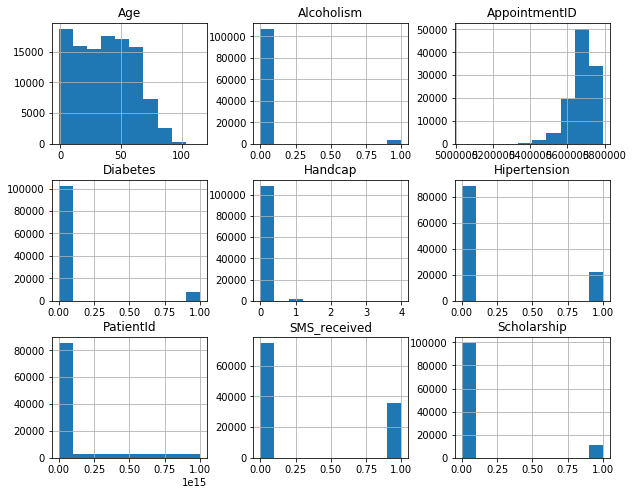

In [9]:
#Plot a histogram of entire dataset
df.hist(figsize = (10,8))

Majority of the patients are:
<br>
<br>
Aged below 50
<br>
Do not take alcohol
<br>
Are not diabetic
<br>
Are not handicaped
<br>
Do not have hypertension
<br>
Did not receive an sms after they booked the appointment
<br>
Did not have a scholarship


In [10]:
# checking for duplicates
df.duplicated().sum()

0

No duplicates in the dataset

In [11]:
#Checking for nulls
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No nulls in the dataset

In [12]:
# Unique
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Here, we notice that the appointment id is unique for each patient and that a patient may have more than one appointment id.


### Data Cleaning
After looking at the general properties of the dataset as well as the information provided about the dataset, I will focus on making the following changes:
<br>
<br>

Data types
<br>
PatientID will be converted to integer from float
AppointmntDay will be converted from object to datetime

Data records
<br>
I shall be doing some data cleaning for age. I noticed some ages are below 0
<br>
The No-show column labels are inverted. I will change them to a 'No' for no show and 'Yes' for a show to avoid any confusion
<br>
The handicap column ahs a maximum value of 4 instead of 1

Column names
<br>
I will standardize the column names for consistency. All will be in lower case and separated with an underscore. Some column names are also mispelled. I will correct that.


In [13]:
# I will start with renaming the columns to correct spelling errors and for consistency and clarity
df.rename(columns={'PatientId':'Patient Id', 'AppointmentID':'Appointment Id', 
                        'AppointmentDay':'Appointment Day','Neighbourhood':'Location', 'Hipertension':'Hypertension',
                        'Handcap':'Handicap', 'No-show':'No Show', }, inplace=True)
#Check the changes
df.head(1)

,Patient Id,Appointment Id,Gender,Appointment Day,Age,Location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No Show
0,2.987250e+13,5642903,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:
#Next I am changing the column names to lower case and replacing the space with an underscore
df.rename(columns=lambda x:x.strip().lower().replace(" ", "_"), inplace=True)

#Check the changes
df.head(1)

,patient_id,appointment_id,gender,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Here, I have cleaned the column names and standardized them.

In [15]:
# convert patient_id from float to int64. But first i will make a copy of my df
df_1 = df
df_1['patient_id'] = df_1['patient_id'].astype('int64')

#Quick check
df_1.head(1)


,patient_id,appointment_id,gender,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [16]:
#Convert appointment_day from object to datetime
df_1['appointment_day'] = pd.to_datetime(df_1['appointment_day'])

#confirm changes
df_1.head(1)

,patient_id,appointment_id,gender,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [17]:
#Re-check the data types
df_1.dtypes

patient_id                  int64
appointment_id              int64
gender                     object
appointment_day    datetime64[ns]
age                         int64
location                   object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

We have now changed the data types of appointment day and patient id. Next, i will make changes on the age column, handicap column and no show column. These columns have issues with the data.

In [18]:
#Age
#checking the ones below 0
df_1.loc[(df_1['age'] < 0)].count()

patient_id         1
appointment_id     1
gender             1
appointment_day    1
age                1
location           1
scholarship        1
hypertension       1
diabetes           1
alcoholism         1
handicap           1
sms_received       1
no_show            1
dtype: int64

In [19]:
#Locating the rows with an age of below zero
low_age = df_1.loc[(df_1['age'] < 0)]

In [20]:
#Since only one record has an age of below 0, i will drop that record
df_1.drop(low_age.index, axis = 0, inplace = True)


In [21]:
#Quick re-check
df_1.loc[(df_1['age'] < 0)].count()

patient_id         0
appointment_id     0
gender             0
appointment_day    0
age                0
location           0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

I have cleaned up the age column by dropping rceords with an age of below 0. I choose to retain records for patients with an age of above 100 because it is possible for a patient to be above 100 years old.
<br>
Next, i am looking at the handicap column

In [22]:
#Examine the handicap column
df_1['handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

I do not feel that this column will be useful in my analysis. Many columns have values above 1. Therefore I will proceed to drop it.

In [23]:
#dropping the handicap column
df_1.drop(['handicap'], axis = 1, inplace = True)

#confirm change
df_1.head()

,patient_id,appointment_id,gender,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,No


Next, I will look at the no show column. I will interchange the values.

In [24]:
#quick analysis of counts before changing the values
df_1['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

In [25]:
df_1['no_show_corrected'] = np.where(df_1['no_show'] == 'Yes', 'No', 'Yes')
df_1.head(1)

,patient_id,appointment_id,gender,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,no_show_corrected
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No,Yes


In [26]:
#quick analysis of counts
df_1['no_show_corrected'].value_counts()

Yes    88207
No     22319
Name: no_show_corrected, dtype: int64

In [27]:
#Drop the previous no_show column
df_1.drop(['no_show'], axis = 1, inplace = True)

#confirm change
df_1.head()

,patient_id,appointment_id,gender,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show_corrected
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,Yes
1,558997776694438,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,Yes
2,4262962299951,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,Yes
3,867951213174,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,Yes
4,8841186448183,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,Yes


In [28]:
#Recheck my data types
df_1.dtypes

patient_id                    int64
appointment_id                int64
gender                       object
appointment_day      datetime64[ns]
age                           int64
location                     object
scholarship                   int64
hypertension                  int64
diabetes                      int64
alcoholism                    int64
sms_received                  int64
no_show_corrected            object
dtype: object

### Mutating some columns

I would like to mutate a new coulmn:
    <br>
    <br>
Add a new column called 'appointment_dayofweek'

In [29]:
#Create a copy of my df
df_v1 = df_1

# Extract the appointment day of week 
df_v1['appointment_wday'] = df_v1['appointment_day'].dt.weekday_name
df_v1.head(1)

,patient_id,appointment_id,gender,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show_corrected,appointment_wday
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,Yes,Friday


In [30]:
df_v1.head(5)

,patient_id,appointment_id,gender,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show_corrected,appointment_wday
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,Yes,Friday
1,558997776694438,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,Yes,Friday
2,4262962299951,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,Yes,Friday
3,867951213174,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,Yes,Friday
4,8841186448183,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,Yes,Friday


In [31]:
#save my dataset just in case
df_v1.to_csv('no_show_dataset_clean.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the gender distribution of the patients that showed up versus those who did not show up?

In [32]:
#Creating a copy of my df and printing a few rows
df_clean = df_v1
df_clean.head(5)


,patient_id,appointment_id,gender,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show_corrected,appointment_wday
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,Yes,Friday
1,558997776694438,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,Yes,Friday
2,4262962299951,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,Yes,Friday
3,867951213174,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,Yes,Friday
4,8841186448183,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,Yes,Friday


In [33]:
df_clean['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [34]:
# A fucntion to assist me in my analysis of gender
def missed_ratio(dataframe, feature, value):
    all_appoints = len(dataframe.loc[dataframe[feature] == value])
    missid_appoints = len(dataframe.loc[(dataframe[feature] == value) & (df_clean['no_show_corrected'] == "No")])
    return (missid_appoints / all_appoints) * 100

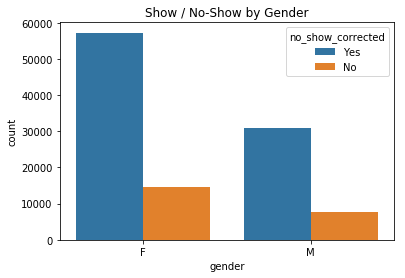

Out of 71839 appointments made by females, 14594 were missed with the ratio of 20%.
Out of 38687 appointments made by males, 7725 were missed with the ratio of 20%.


In [35]:
all_appointments_by_f = len(df_clean.loc[df_clean['gender'] == "F"])
all_appointments_by_m = len(df_clean.loc[df_clean['gender'] == "M"])

missed_appointments_by_f = len(df_clean.query('no_show_corrected == "No" and gender == "F"'))
missed_appointments_by_m = len(df_clean.loc[(df_clean['gender'] == "M") & (df_clean['no_show_corrected'] == "No")])

missed_ratio_f = int(round(missed_appointments_by_f/all_appointments_by_f*100))
missed_ratio_m = int(round(missed_appointments_by_m/all_appointments_by_m*100))

missed_ratio(df_clean, 'gender', "F")
missed_ratio(df_clean,'gender', "M")


ax = sns.countplot(x=df_clean.gender, hue=df_clean.no_show_corrected, data=df_clean)
ax.set_title("Show / No-Show by Gender")
x_ticks_labels=['Female', 'Male']
plt.show();

print('Out of {} appointments made by females, {} were missed with the ratio of {}%.'.format(all_appointments_by_f, missed_appointments_by_f, missed_ratio_f))
print('Out of {} appointments made by males, {} were missed with the ratio of {}%.'.format(all_appointments_by_m, missed_appointments_by_m, missed_ratio_m))

Conclusion
<br>
<br>
From the analysis above, it is clear that we have more female patients who made appointments compared to male; However, wehen we look at the proportion of females versus males who attended their approintments, we see that the proportion is the same. Hnece gender does not seem to have an effect on whether a patient shows up for an appointment or not.

### Research Question 2 : Is showing up or not showing up for an appointment affected by the health condition?

In [36]:
#Apply filters on my cleaned dataset to isolate the datasets i need
hypertension_data = df_clean.groupby('hypertension').no_show_corrected.value_counts()
diabetes_data = df_clean.groupby('diabetes').no_show_corrected.value_counts()
alcoholism_data = df_clean.groupby('alcoholism').no_show_corrected.value_counts()
hypertension_data, diabetes_data, alcoholism_data

(hypertension  no_show_corrected
 0             Yes                  70178
               No                   18547
 1             Yes                  18029
               No                    3772
 Name: no_show_corrected, dtype: int64, diabetes  no_show_corrected
 0         Yes                  81694
           No                   20889
 1         Yes                   6513
           No                    1430
 Name: no_show_corrected, dtype: int64, alcoholism  no_show_corrected
 0           Yes                  85524
             No                   21642
 1           Yes                   2683
             No                     677
 Name: no_show_corrected, dtype: int64)

In [37]:
# Exploration
ns_yes_df = df_clean.query('no_show_corrected == "No"')
ns_percentages = []
def print_no_show_health_stats(value, h_type):
    percent = ((value/len(ns_yes_df.index)) * 100).round(2)
    ns_percentages.append([h_type, percent])
    print("{} Patients i.e, {}% who failed to show up for their appointment are associated with {}\n".format(
        value, percent, h_type))
    
print_no_show_health_stats(hypertension_data[1]['No'], 'hypertension')
print_no_show_health_stats(diabetes_data[1]['No'], 'diabetes')
print_no_show_health_stats(alcoholism_data[1]['No'], 'alcoholism')

3772 Patients i.e, 16.9% who failed to show up for their appointment are associated with hypertension

1430 Patients i.e, 6.41% who failed to show up for their appointment are associated with diabetes

677 Patients i.e, 3.03% who failed to show up for their appointment are associated with alcoholism



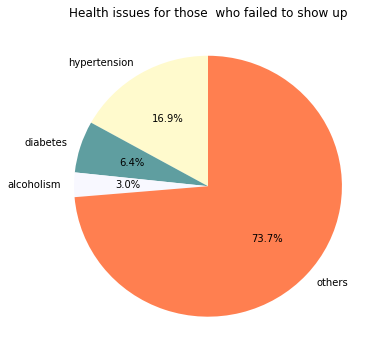

In [38]:
#Visualization for those who did not show up
other_patients = 100 - (ns_percentages[0][1] + ns_percentages[1][1] + ns_percentages[2][1])
values = [ns_percentages[0][1], ns_percentages[1][1], ns_percentages[2][1], other_patients]
labels = ['hypertension', 'diabetes', 'alcoholism', 'others']
colors = ['lemonchiffon', 'cadetblue', 'ghostwhite', 'coral']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Health issues for those  who failed to show up') 
fig = plt.gcf()
fig.set_size_inches(6,6);

Conclusion
<br>
<br>
For patients who did not show up for their appointments, we see that 73.7% had other conditions other than hypertension, diabetes or alcoholism

In [39]:
#Exploration
ns_no_df = df_clean.query('no_show_corrected == "Yes"')
s_percentages = []
def print_show_health_stats(value, h_type):
    percent = ((value/len(ns_no_df.index)) * 100).round(2)
    s_percentages.append([h_type, percent])
    print("{} Patients i.e, {}% who showed up to their appointment are associated with {}\n".format(value, percent, h_type))
    
print_show_health_stats(hypertension_data[1]['Yes'], 'hypertension')
print_show_health_stats(diabetes_data[1]['Yes'], 'diabetes')
print_show_health_stats(alcoholism_data[1]['Yes'], 'alcoholism')

18029 Patients i.e, 20.44% who showed up to their appointment are associated with hypertension

6513 Patients i.e, 7.38% who showed up to their appointment are associated with diabetes

2683 Patients i.e, 3.04% who showed up to their appointment are associated with alcoholism



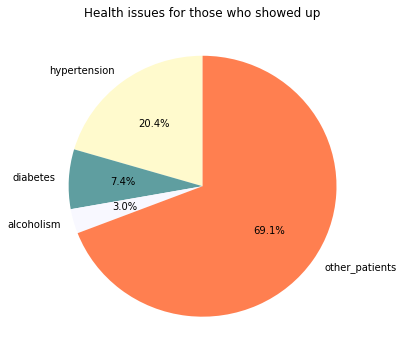

In [40]:
#Visualization for those who showed up
other_patients = 100 - (s_percentages[0][1] + s_percentages[1][1] + s_percentages[2][1])
values = [s_percentages[0][1], s_percentages[1][1], s_percentages[2][1], other_patients]
labels = ['hypertension', 'diabetes', 'alcoholism', 'other_patients']
colors = ['lemonchiffon', 'cadetblue', 'ghostwhite', 'coral']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Health issues for those who showed up') 
fig = plt.gcf()
fig.set_size_inches(6,6);

Conclusion
<br>
<br>
Majority of the patients who showed up had other conditions other than hypertension, diabetes or alcoholism

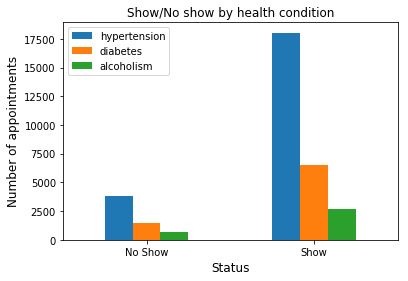

In [41]:
ax = df_clean.groupby('no_show_corrected').sum()[['hypertension','diabetes','alcoholism']].plot(kind='bar');
ax.set_xlabel("Status",fontsize=12);
ax.set_ylabel("Number of appointments",fontsize=12);
ax.set_xticklabels(['No Show',"Show"], rotation=0);
plt.title('Show/No show by health condition')
plt.show();

Conclusion:
    <br>
    <br>
   Hypertension, Diabetes and alcoholism do not seem to have a major effect on whether a patient showed up for an appointment or not. There is no major difference comparing the proportion of those affected by these conditions versus those who are not. 

### Research Question 3 : Does the day of the week in which the appointment is made affect whether a patient shows up  for an appointment or not?

In [42]:
no_shows = df_clean.query('no_show_corrected == "No"')

# Data to plot
nos_mon = no_shows.query('appointment_wday == "Monday"')
nos_mon = nos_mon['appointment_wday'].count()

nos_tue = no_shows.query('appointment_wday == "Tuesday"')
nos_tue = nos_tue['appointment_wday'].count()

nos_wed = no_shows.query('appointment_wday == "Wednesday"')
nos_wed = nos_wed['appointment_wday'].count()

nos_thu = no_shows.query('appointment_wday == "Thursday"')
nos_thu = nos_thu['appointment_wday'].count()

nos_fri = no_shows.query('appointment_wday == "Friday"')
nos_fri = nos_fri['appointment_wday'].count()

nos_sat = no_shows.query('appointment_wday == "Saturday"')
nos_sat = nos_sat['appointment_wday'].count()

nos_sun = no_shows.query('appointment_wday == "Sunday"')
nos_sun = nos_sun['appointment_wday'].count()

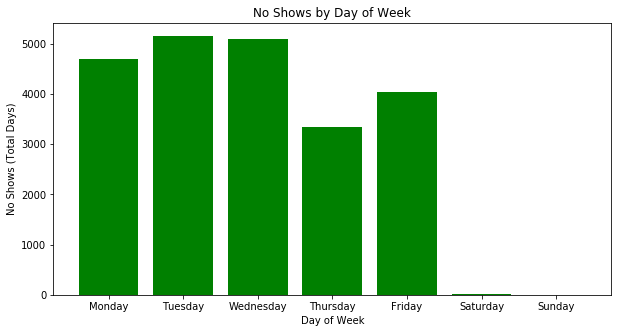

In [43]:
# Visualization
locations = [1, 2, 3, 4, 5, 6, 7]
heights = [nos_mon, nos_tue, nos_wed, nos_thu, nos_fri, nos_sat, nos_sun]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar(locations, heights, tick_label=labels, color='green')
plt.title('No Shows by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No Shows (Total Days)')

fig = plt.gcf()
fig.set_size_inches(10,5);

Conclusion:
<br>
<br>
Looking at the distribution of patients who did not show up, we see that majority failed to show up when their appointments were on week days. very few missed on weekends.

<a id='conclusions'></a>
## Conclusions
From our research, we have looked at gender, health conditions and day of week of the appointment date & how they affect whether a patient shows up for an appointment or not. 
<br>
Gender - Proportion of those who failed to show up for their appointments was 20% for both males and females. These shows that gender does not affect whether a patient shows up or not.

<br>
Health condition - Having analyzed patients with diabetes, hypertension and alcoholism and whether they showed up for their appointments or not, we found out that this also did not have an effect. Majority of patients who did not show up had other conditions other than the 3. This was the case for those who showed up

<br>
Day of weeek - Majority of patients who failed to show up did so when the appointments fell on weekdays and most especially early in the week. Therefore day of week is important in determing wherher a patient shows up or not.


### Limitation
The dataset is small and the variables available are few. A more robust dataset would provide more concusive findings on what determines whether a patient will show up for an appointment or not.

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0